In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import nivapy3 as nivapy
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Add GeoJson data to Etna (PostGIS)

Adding a GeoJson file to the "nivakart" PostGIS database running on the Etna server.

In [2]:
def connect():
    import getpass
    import os
    from sqlalchemy import create_engine

    # Get credentials
    host = getpass.getpass(prompt='Host: ')
    port = getpass.getpass(prompt='Port: ')
    db = getpass.getpass(prompt='DB name: ')    
    user = getpass.getpass(prompt='Username: ')
    pw = getpass.getpass(prompt='Password: ')
    
    # Connect
    try:
        conn_str = r'postgresql+psycopg2://%s:%s@%s:%s/%s' % (user, pw, host, port, db)
        engine = create_engine(conn_str)
        conn = engine.connect() 
        print('Connection successful.')
        
    except Exception as e: 
        print(e)

    return engine

In [3]:
# Connect to Etna
eng = connect()

Host:  ············
Port:  ····
DB name:  ········
Username:  ········
Password:  ········


Connection successful.


## 1. Read GeoJson

In [4]:
# Read file from Roar
gdf = gpd.read_file('Naturvernomr_2019-05-20_13-00.json')

# Get geo_type for each row
gdf['geom_type'] = gdf['geometry'].geom_type

# Describe
print('CRS:', gdf.crs)
print('The following geometries are present:', gdf['geom_type'].unique())

# Get just polygons
gdf = gdf.query("geom_type == 'Polygon'")
print(len(gdf), 'polygons in dataset.')

gdf.head()

CRS: {'init': 'epsg:4326'}
The following geometries are present: ['Point' 'Polygon' 'LineString']
3886 polygons in dataset.


,objekttype,datafangstdato,kvalitet_nøyaktighet,kvalitet_målemetode,_timestamp,grensepunktnummer,grensemerkenedsatti,grensepunkttype,ident_navnerom,ident_lokalid,...,vern_verneplan,vernnetverk,områdeplanstatus_plandato,moblandprioritet,nettverk,jsvsak,adm_grense,følger_terrengdet,geometry,geom_type
18283,Naturvernområde,None,None,None,2019-05-20_13-00,None,None,None,NO.MILJODIREKTORATET.NATURBASE,VV00000001,...,3,2,1 1,G,,None,None,None,"POLYGON ((29.29534412975211 69.75702317495124,...",Polygon
18284,Naturvernområde,None,None,None,2019-05-20_13-00,None,None,None,NO.MILJODIREKTORATET.NATURBASE,VV00000002,...,6,2,1 1,G,,None,None,None,"POLYGON ((29.11466048992764 69.15360286526145,...",Polygon
18285,Naturvernområde,None,None,None,2019-05-20_13-00,None,None,None,NO.MILJODIREKTORATET.NATURBASE,VV00000003,...,8,,1 1,G,,None,None,None,"POLYGON ((24.2207241407858 70.51712597197081, ...",Polygon
18286,Naturvernområde,None,None,None,2019-05-20_13-00,None,None,None,NO.MILJODIREKTORATET.NATURBASE,VV00000004,...,8,,1 1,G,,None,None,None,"POLYGON ((26.21680782438557 70.78675618564372,...",Polygon
18287,Naturvernområde,None,None,None,2019-05-20_13-00,None,None,None,NO.MILJODIREKTORATET.NATURBASE,VV00000005,...,8,2,1 1,G,,None,None,None,"POLYGON ((30.99918999876512 70.41353975557786,...",Polygon


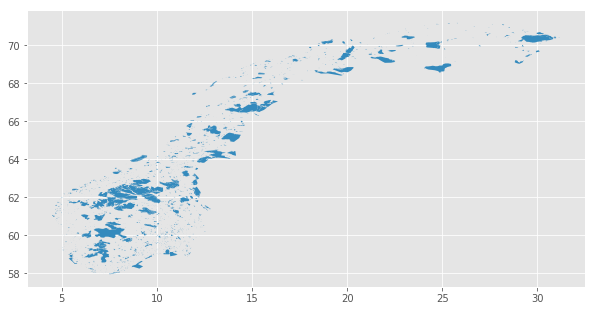

In [5]:
gdf.plot(figsize=(10,10))

## 2. Add to db

In [6]:
nivapy.da.gdf_to_postgis(gdf, 
                         'miljodir_naturvern_f',
                         'public',
                         eng,
                         'public_miljodir_naturvern_f_spidx',
                         if_exists='replace')